<img src='https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/banner_ikomia.png?raw=true'>




# How to run OWLv2 with the Ikomia API

OWLv2 is an open-vocabulary object detection developed by researchers at Google DeepMind. OWLv2 builds on the foundation of OWL-ViT but introduces key innovations to dramatically scale up training and improve performance.

## Setup

Please use a GPU for this tutorial.

In the Google colab menu, select "Runtime" then "Change runtime type", choose GPU in "Hardware accelerator".

Check your GPU with the following command:

In [1]:
!nvidia-smi

Thu Jun 27 11:47:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

First, you need to install Ikomia API pip package.

## Run OWLv2 zero-shot object detection on your image

In [1]:
from ikomia.dataprocess.workflow import Workflow
from ikomia.utils.displayIO import display


# Init your workflow
wf = Workflow()

# Add the OWLv2 Object Detector
owl = wf.add_task(name="infer_owl_v2", auto_connect=True)
owl.set_parameters({
    "model_name":"google/owlv2-base-patch16",
    "prompt":"a cat, remote control",
    "conf_thres":"0.25",
    "cuda":"True"
})

# Run on your image
# wf.run_on(path="path/to/your/image.png")
wf.run_on(url='http://images.cocodataset.org/val2017/000000039769.jpg')



/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
000000039769.jpg: 100%|██████████| 169k/169k [00:00<00:00, 667kiB/s] 
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: F

Workflow Untitled run successfully in 6810.885226 ms.


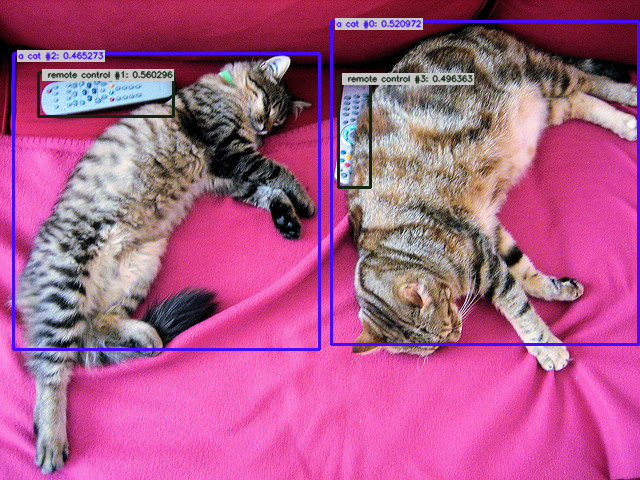

In [2]:
# Display image on Google Colab
from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

# Inspect your results
display(owl.get_image_with_graphics())

List of parameters:

- model_name (str) - default 'google/owlv2-base-patch16-ensemble': The OWLv2 algorithm has different checkpoint models
    -  google/owlv2-base-patch16-ensemble
    - google/owlv2-base-patch16
    - google/owlv2-base-patch16-finetuned
    - google/owlv2-large-patch14
    - google/owlv2-large-patch14-finetuned
- prompt (str) - default 'a cat, remote control': Text prompt for the model
- conf_thres (float) - default '0.2': Box threshold for the prediction‍
- cuda (bool): If True, CUDA-based inference (GPU). If False, run on CPU
